In [148]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

You can get the dataset from https://densitydesign.github.io/strumentalia-seealsology/

__Steps to download:__

a) Enter the following links:

https://en.wikipedia.org/wiki/Space_research

https://en.wikipedia.org/wiki/Space_Race

https://en.wikipedia.org/wiki/Space_exploration

b) Download the TSV file.

In [3]:
df = pd.read_csv("space_data.tsv", sep = "\t")

In [5]:
df.head()

,source,target,depth
0,space exploration,discovery and exploration of the solar system,1
1,space exploration,in-space propulsion technologies,1
2,space exploration,robotic spacecraft,1
3,space exploration,timeline of planetary exploration,1
4,space exploration,landings on other planets,1


In [6]:
df.shape

(3328, 3)

In [ ]:
# construct an undirected graph
G=nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())

In [50]:
len(G) # number of nodes

2088

In [139]:
# function to generate random walk sequences of nodes
def get_randomwalk(node, path_length):
    
    random_walk = [node]
    
    for i in range(path_length-1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

In [141]:
get_randomwalk('space exploration', 10)

['space exploration',
 'atmospheric reentry',
 'mars pathfinder',
 'scientific information from the mars exploration rover mission',
 'opportunity rover',
 'spirit rover',
 'aeolis quadrangle',
 'mars science laboratory',
 'mars 2020',
 'exomars']

In [149]:
all_nodes = list(G.nodes())

random_walks = []

for n in tqdm(all_nodes):
    for i in range(5):
        random_walks.append(get_randomwalk(n,10))

100%|██████████| 2088/2088 [00:00<00:00, 7717.75it/s]


In [151]:
# count of sequences
len(random_walks)

10440

In [152]:
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [207]:
# train word2vec model
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(random_walks, progress_per=2)

In [208]:
model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)

(982438, 1015840)

In [209]:
print(model)

Word2Vec(vocab=2088, size=100, alpha=0.03)


In [227]:
# find top n similar nodes
model.similar_by_word('astronaut training')

[('reduced-gravity aircraft', 0.9756266474723816),
 ('micro-g environment', 0.9612352252006531),
 ('spaceflight osteopenia', 0.8710659742355347),
 ('microgravity university', 0.8698078393936157),
 ('space flight participant', 0.8578461408615112),
 ('space adaptation syndrome', 0.8436012268066406),
 ('space tourism society', 0.8100888729095459),
 ('lagrange point colonization', 0.7876768112182617),
 ('stanford torus', 0.7843056321144104),
 ('lists of space programs', 0.7734896540641785)]

In [228]:
terms = ['lunar escape systems','soviet moonshot', 'soyuz 7k-l1', 'moon landing',
         'space food', 'food systems on space exploration missions', 'meal, ready-to-eat',
         'space law', 'metalaw', 'moon treaty', 'legal aspects of computing',
         'astronaut training', 'reduced-gravity aircraft', 'space adaptation syndrome', 'micro-g environment']

In [233]:
def plot_nodes(word_list):
    X = model[word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    
    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    plt.show()

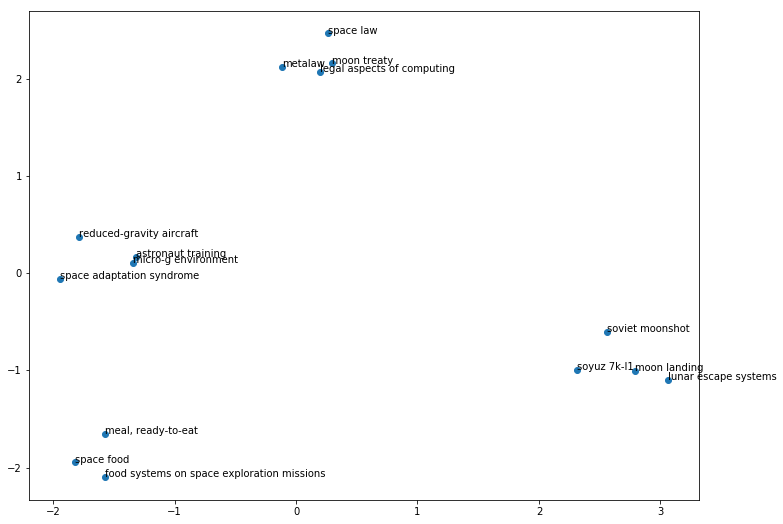

In [234]:
plot_nodes(terms)